In [1]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
archivo_csv = "GRD_PUBLICO_2023.csv"
df = pd.read_csv(archivo_csv, sep='|', on_bad_lines='skip', engine='python', encoding='utf-16')
print(f"Datos cargados exitosamente: {df.shape[0]:,} registros")




display(df.head(5))

Datos cargados exitosamente: 1,039,587 registros


,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,ETNIA,PROVINCIA,COMUNA,NACIONALIDAD,PREVISION,SERVICIO_SALUD,...,FECHAPROCEDIMIENTO1,FECHAINTERV1,ESPECIALIDADINTERVENCION,MEDICOALTA_ENCRIPTADO,USOSPABELLON,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,HOSPPROCEDENCIA
0,122100,72196813,HOMBRE,1980-04-13,OTRO,VALDIVIA,PANGUIPULLI,CHILE,FONASA INSTITUCIONAL - (MAI) A,VALDIVIA,...,NaN,NaN,NaN,87553213,NaN,064161,"0,7094",1,1,NaN
1,114101,DESCONOCIDO,HOMBRE,2001-11-04,OTRO,CORDILLERA,PUENTE ALTO,VENEZUELA (REPÚBLICA BOLIVARIANA DE),PARTICULAR,METROPOLITANO SURORIENTE,...,NaN,NaN,NaN,86895434,1.0,041301,"1,0869",1,1,NaN
2,114101,97627974,HOMBRE,2020-07-30,OTRO,CORDILLERA,PUENTE ALTO,CHILE,FONASA INSTITUCIONAL - (MAI) A,METROPOLITANO SURORIENTE,...,NaN,NaN,NaN,73227424,NaN,044161,"0,4084",1,1,NaN
3,106103,67770674,MUJER,1978-11-14,OTRO,SAN ANTONIO,SAN ANTONIO,CHILE,FONASA INSTITUCIONAL - (MAI) C,VALPARAISO SAN ANTONIO,...,NaN,25-05-2023,OBSTETRICIA Y GINECOLOGÍA,71695588,1.0,131301,"0,6406",1,1,NaN
4,106103,100390800,MUJER,2023-12-20,OTRO,SAN ANTONIO,SAN ANTONIO,CHILE,FONASA INSTITUCIONAL - (MAI) B,VALPARAISO SAN ANTONIO,...,NaN,NaN,NaN,71644222,NaN,074131,"0,5346",1,1,NaN


In [3]:
valores = list(df["SERVICIO_SALUD"].unique())
valores

diccionario = {}
for i in valores:
    if "METROPOLITANO" in i:
        diccionario[i] = "METROPOLITANO"
    else:
        diccionario[i] = i
        
display(diccionario)

df["SERVICIO_SALUD"] = df["SERVICIO_SALUD"].map(diccionario)
df = df[df["SERVICIO_SALUD"] != "DESCONOCIDO"]
df = df[df["PREVISION"] != "DESCONOCIDO"]

{'VALDIVIA': 'VALDIVIA',
 'METROPOLITANO SURORIENTE': 'METROPOLITANO',
 'VALPARAISO SAN ANTONIO': 'VALPARAISO SAN ANTONIO',
 'ACONCAGUA': 'ACONCAGUA',
 'METROPOLITANO ORIENTE': 'METROPOLITANO',
 'COQUIMBO': 'COQUIMBO',
 'DEL RELONCAVÍ': 'DEL RELONCAVÍ',
 'DEL MAULE': 'DEL MAULE',
 'LIBERTADOR B. O HIGGINS': 'LIBERTADOR B. O HIGGINS',
 'VIÑA DEL MAR QUILLOTA': 'VIÑA DEL MAR QUILLOTA',
 'ARAUCANÍA SUR': 'ARAUCANÍA SUR',
 'METROPOLITANO CENTRAL': 'METROPOLITANO',
 'ARAUCANÍA NORTE': 'ARAUCANÍA NORTE',
 'TALCAHUANO': 'TALCAHUANO',
 'METROPOLITANO OCCIDENTE': 'METROPOLITANO',
 'IQUIQUE': 'IQUIQUE',
 'OSORNO': 'OSORNO',
 'ANTOFAGASTA': 'ANTOFAGASTA',
 'CONCEPCIÓN': 'CONCEPCIÓN',
 'ARICA': 'ARICA',
 'ÑUBLE': 'ÑUBLE',
 'ATACAMA': 'ATACAMA',
 'AYSEN': 'AYSEN',
 'METROPOLITANO SUR': 'METROPOLITANO',
 'METROPOLITANO NORTE': 'METROPOLITANO',
 'BIOBIO': 'BIOBIO',
 'ARAUCO': 'ARAUCO',
 'CHILOÉ': 'CHILOÉ',
 'DESCONOCIDO': 'DESCONOCIDO',
 'MAGALLANES': 'MAGALLANES'}

In [4]:
def Convert_To_Point(data):
    new_data = []
    for num in data:
        new_num = []
        for char in num:
            new_num.append(char) if char != "," else new_num.append(".")

        new_data.append(float(''.join(new_num)))

    return new_data

df = df[(df["SERVICIO_SALUD"] != "DESCONOCIDO") & (df["IR_29301_PESO"] != "DESCONOCIDO")]

df["IR_29301_PESO"] = Convert_To_Point(df["IR_29301_PESO"])

In [5]:
df["FECHAALTA"] = pd.to_datetime(df["FECHAALTA"], dayfirst=True)
df["FECHA_INGRESO"] = pd.to_datetime(df["FECHA_INGRESO"], dayfirst=True)

df["TIEMPO_ESTANCIA"] = (df["FECHAALTA"]-df["FECHA_INGRESO"])
df["TIEMPO_ESTANCIA"] = df["TIEMPO_ESTANCIA"].dt.days

df[["FECHAALTA","FECHA_INGRESO","TIEMPO_ESTANCIA"]].sample()
df['FECHA_NACIMIENTO'] = df[df['FECHA_NACIMIENTO'] != "DESCONOCIDO"]["FECHA_NACIMIENTO"]
df['FECHA_INGRESO'] = df[df['FECHA_INGRESO'] != "DESCONOCIDO"]["FECHA_INGRESO"]
df['FECHAALTA'] = df[df['FECHAALTA'] != "DESCONOCIDO"]["FECHAALTA"]

df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], dayfirst=True)
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'], dayfirst=True)
df['FECHAALTA'] = pd.to_datetime(df['FECHAALTA'], dayfirst=True)
df['EDAD'] = ((df['FECHA_INGRESO'] - df['FECHA_NACIMIENTO']).dt.days / 365.25).round().astype('Int64')

C:\Users\Darienn\AppData\Local\Temp\ipykernel_31068\49516806.py:12: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], dayfirst=True)


In [6]:
valores = list(df["SERVICIO_SALUD"].unique())
valores

diccionario = {}
for i in valores:
    if "METROPOLITANO" in i:
        diccionario[i] = "METROPOLITANO"
    else:
        diccionario[i] = "PROVINCIA"
        
diccionario

df["TipoRegion"] = df["SERVICIO_SALUD"].map(diccionario)
df = df[df["TipoRegion"] != "DESCONOCIDO"]



diccionario = {}
for i in valores:
    if "METROPOLITANO" in i:
        diccionario[i] = "METROPOLITANO"

    elif "ARAUCANÍA" in i: 
        diccionario[i] = "ARAUCANÍA"

    elif "VIÑA" in i or "VALPARAISO" in i or "ACONCAGUA" in i: 
        diccionario[i] = "VALPARAISO"

    elif "VALDIVIA" in i:
        diccionario[i] = "RIOS"

    elif "RELONCAVÍ" in i or "OSORNO" in i or "CHILOÉ" in i:
        diccionario[i] = "LAGOS"

    elif "TALCAHUANO" in i or "CONCEPCIÓN" in i or "BIOBIO" in i or "ARAUCO" in i:
        diccionario[i] = "BIOBIO"

    elif "IQUIQUE" in i:
        diccionario[i] = "TARAPACA"

    else:
        diccionario[i] = i

print(diccionario)

df["Region"] = df["SERVICIO_SALUD"].map(diccionario)
df = df[df["Region"] != "DESCONOCIDO"]


{'VALDIVIA': 'RIOS', 'METROPOLITANO': 'METROPOLITANO', 'VALPARAISO SAN ANTONIO': 'VALPARAISO', 'ACONCAGUA': 'VALPARAISO', 'COQUIMBO': 'COQUIMBO', 'DEL RELONCAVÍ': 'LAGOS', 'DEL MAULE': 'DEL MAULE', 'LIBERTADOR B. O HIGGINS': 'LIBERTADOR B. O HIGGINS', 'VIÑA DEL MAR QUILLOTA': 'VALPARAISO', 'ARAUCANÍA SUR': 'ARAUCANÍA', 'ARAUCANÍA NORTE': 'ARAUCANÍA', 'TALCAHUANO': 'BIOBIO', 'IQUIQUE': 'TARAPACA', 'OSORNO': 'LAGOS', 'ANTOFAGASTA': 'ANTOFAGASTA', 'CONCEPCIÓN': 'BIOBIO', 'ARICA': 'ARICA', 'ÑUBLE': 'ÑUBLE', 'ATACAMA': 'ATACAMA', 'AYSEN': 'AYSEN', 'BIOBIO': 'BIOBIO', 'ARAUCO': 'BIOBIO', 'CHILOÉ': 'LAGOS', 'MAGALLANES': 'MAGALLANES'}


In [19]:
# Análisis de outliers en la variable TIEMPO_ESTANCIA
from matplotlib.ticker import ScalarFormatter

# Cálculo de límites usando el método IQR
q1 = df["TIEMPO_ESTANCIA"].quantile(0.25)
q3 = df["TIEMPO_ESTANCIA"].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")

# Identificación de outliers
outliers = df[(df["TIEMPO_ESTANCIA"] < limite_inferior) | (df["TIEMPO_ESTANCIA"] > limite_superior)]
print(f"Número de outliers: {len(outliers)}")

# DataFrame sin outliers
df_sin_outliers1 = df[(df["TIEMPO_ESTANCIA"] >= limite_inferior) & (df["TIEMPO_ESTANCIA"] <= limite_superior)]


# Cálculo de límites usando el método IQR
q1 = df_sin_outliers1["IR_29301_PESO"].quantile(0.25)
q3 = df_sin_outliers1["IR_29301_PESO"].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")

# Identificación de outliers
outliers = df_sin_outliers1[(df_sin_outliers1["IR_29301_PESO"] < limite_inferior) | (df_sin_outliers1["IR_29301_PESO"] > limite_superior)]
print(f"Número de outliers: {len(outliers)}")

# DataFrame sin outliers
df_sin_outliers = df_sin_outliers1[(df_sin_outliers1["IR_29301_PESO"] >= limite_inferior) & (df_sin_outliers1["IR_29301_PESO"] <= limite_superior)]



Límite inferior: -6.50
Límite superior: 13.50
Número de outliers: 106238
Límite inferior: -0.38
Límite superior: 1.80
Número de outliers: 46979


In [ ]:
data = df_sin_outliers[["TipoRegion","Region","TIPO_INGRESO","TIEMPO_ESTANCIA","EDAD","SEXO","PREVISION","IR_29301_PESO"]].dropna()
data = data[data["Region"]!="AYSEN"]

previsiones = []
l = data["PREVISION"].unique().tolist()
for i in l:
    if "LIBRE ELECCIÓN" not in i:
        previsiones.append(i)
    


data = data[data["PREVISION"].isin(previsiones)]

for i in data["PREVISION"].unique():
    if "ISAPRE" in i:
        data.loc[data["PREVISION"] == i, "PREVISION"] = "ISAPRE"
    elif "FONASA" in i:
        data.loc[data["PREVISION"] == i, "PREVISION"] = "FONASA"
    else:
        data.loc[data["PREVISION"] == i, "PREVISION"] = "OTRO"


In [105]:
display(data["SEXO"].unique())

array(['HOMBRE', 'MUJER', 'DESCONOCIDO'], dtype=object)

In [91]:
# 1) Separamos los datos de la Región Metropolitana de los del resto
df_metro = data[data["Region"] == "METROPOLITANO"].copy()
df_no_metro = data[data["Region"] != "METROPOLITANO"].copy()

# 2) Calculamos cuántos registros hay en la Región Metropolitana
count_metro = len(df_metro)

# 3) Para cada región distinta de la Metropolitana,
#    obtenemos un número de muestras proporcional a su peso relativo dentro de df_no_metro
df_sample_list = []
total_no_metro = len(df_no_metro)

for region, subset in df_no_metro.groupby("Region"):
    proportion = len(subset) / total_no_metro
    n_samples = int(round(proportion * count_metro))
    sample_region = subset.sample(n_samples, random_state=42)
    df_sample_list.append(sample_region)

# 4) Unimos en un único DataFrame todas las muestras de regiones no metropolitanas
df_no_metro_sampled = pd.concat(df_sample_list, ignore_index=True)

# 5) Verificamos tamaños
print("Tamaño total Región Metropolitana:", len(df_metro))
print("Tamaño total de la muestra (regiones no metropolitanas):", len(df_no_metro_sampled))

all_data = pd.concat([df_metro, df_no_metro_sampled], ignore_index=True)
print("Tamaño total de la muestra:", len(all_data))

Tamaño total Región Metropolitana: 293290
Tamaño total de la muestra (regiones no metropolitanas): 293290
Tamaño total de la muestra: 586580


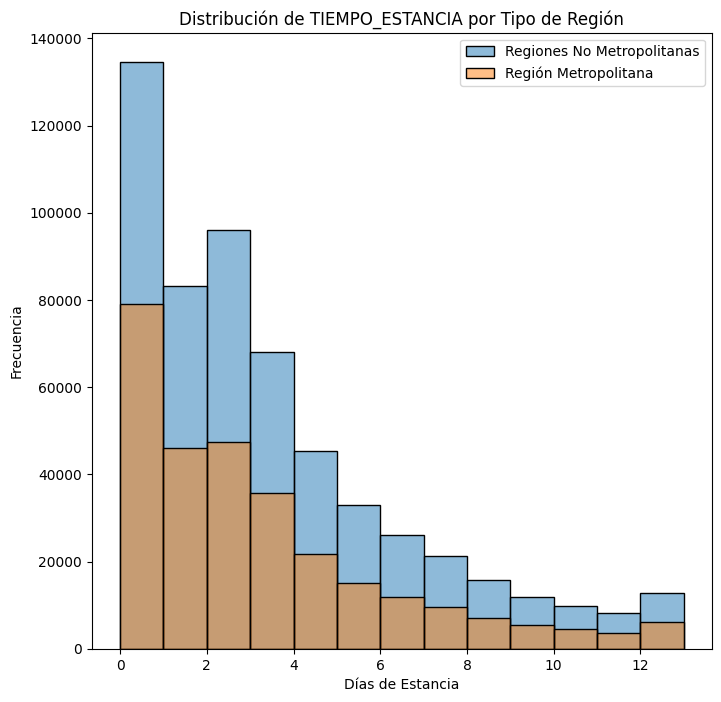

In [77]:
plt.figure(figsize=(8, 8))
sns.histplot(data[data["TipoRegion"] == "PROVINCIA"] ["TIEMPO_ESTANCIA"], binwidth=1, kde=False, alpha=0.5, label="Regiones No Metropolitanas")
sns.histplot(data[data["TipoRegion"] == "METROPOLITANO"] ["TIEMPO_ESTANCIA"], binwidth=1, kde=False, alpha=0.5, label="Región Metropolitana")
# sns.histplot(df_metro["TIEMPO_ESTANCIA"], binwidth=1, kde=False, alpha=0.5)
plt.title("Distribución de TIEMPO_ESTANCIA por Tipo de Región")
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')  # También ayuda a forzar notación normal
plt.xlabel("Días de Estancia")
plt.ylabel("Frecuencia")
# plt.xlim(0, 40)
plt.legend()
plt.show()

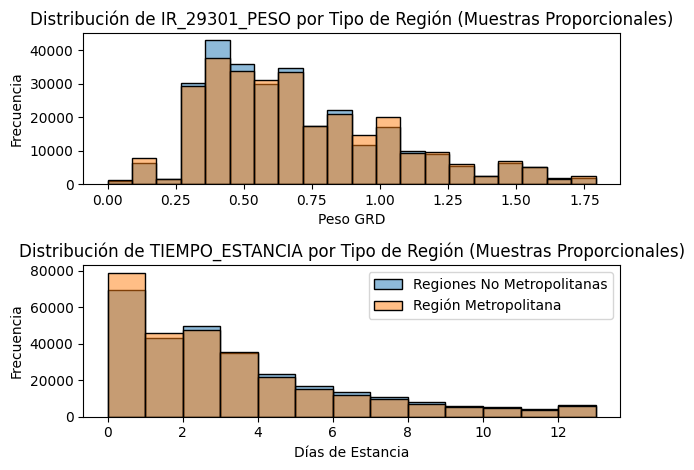

In [112]:
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# sns.histplot(data[data["TipoRegion"] == "PROVINCIA"]["TIEMPO_ESTANCIA"], binwidth=1, alpha=0.5, label="Regiones No Metropolitanas")
# sns.histplot(data[data["TipoRegion"] == "METROPOLITANO"]["TIEMPO_ESTANCIA"], binwidth=1, alpha=0.5, label="Región Metropolitana")
# # sns.histplot(df_metro["TIEMPO_ESTANCIA"], binwidth=1, kde=False, alpha=0.5)
# plt.title("Distribución de TIEMPO_ESTANCIA por Tipo de Región (Total Muestras)")
# plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
# plt.ticklabel_format(style='plain', axis='x')  # También ayuda a forzar notación normal
# plt.xlabel("Peso GRD")
# plt.ylabel("Frecuencia")
# # plt.xlim(0, 40)
# plt.legend()


plt.subplot(2, 1, 1)
sns.histplot(df_no_metro_sampled["IR_29301_PESO"], bins=20, alpha=0.5, label="Regiones No Metropolitanas")
sns.histplot(df_metro["IR_29301_PESO"], bins=20,  alpha=0.5, label="Región Metropolitana")
# sns.histplot(df_metro["TIEMPO_ESTANCIA"], binwidth=1, kde=False, alpha=0.5)
plt.title("Distribución de IR_29301_PESO por Tipo de Región (Muestras Proporcionales)")
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')  # También ayuda a forzar notación normal
plt.xlabel("Peso GRD")
plt.ylabel("Frecuencia")

plt.subplot(2, 1, 2)
sns.histplot(df_no_metro_sampled["TIEMPO_ESTANCIA"], binwidth=1, alpha=0.5, label="Regiones No Metropolitanas")
sns.histplot(df_metro["TIEMPO_ESTANCIA"], binwidth=1, alpha=0.5, label="Región Metropolitana")
# sns.histplot(df_metro["TIEMPO_ESTANCIA"], binwidth=1, kde=False, alpha=0.5)
plt.title("Distribución de TIEMPO_ESTANCIA por Tipo de Región (Muestras Proporcionales)")
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')  # También ayuda a forzar notación normal
plt.xlabel("Días de Estancia")
plt.ylabel("Frecuencia")
plt.legend()
# plt.xlim(0, 40)


plt.tight_layout()
plt.show()

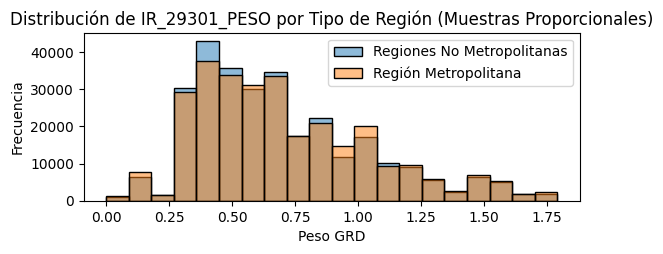

In [ ]:


plt.legend()

In [80]:
pd.DataFrame(data["IR_29301_PESO"].describe()).T["max"]


IR_29301_PESO    1.7912
Name: max, dtype: float64

Text(0.5, 1.0, 'Cantidad de Pacientes por Prevision')

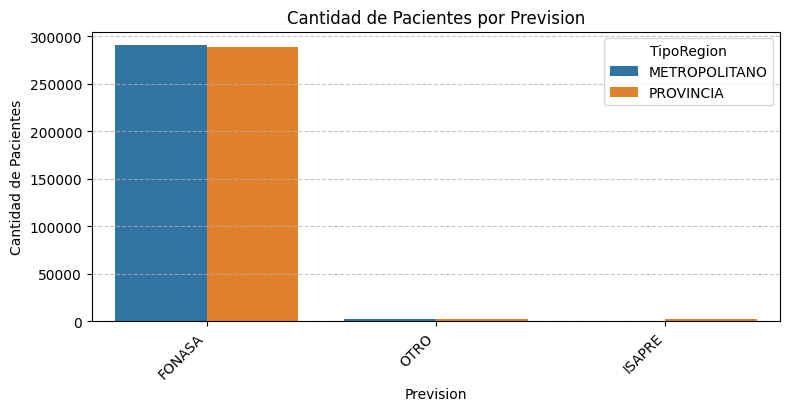

In [96]:
# df.groupby(["PREVISION"]).count()["COD_HOSPITAL"].sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x='PREVISION', y='IR_29301_PESO', data=all_data, estimator=len, hue="TipoRegion", order=all_data.groupby('PREVISION')['IR_29301_PESO'].count().sort_values(ascending=False).index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Prevision')
plt.ylabel('Cantidad de Pacientes')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title('Cantidad de Pacientes por Prevision')

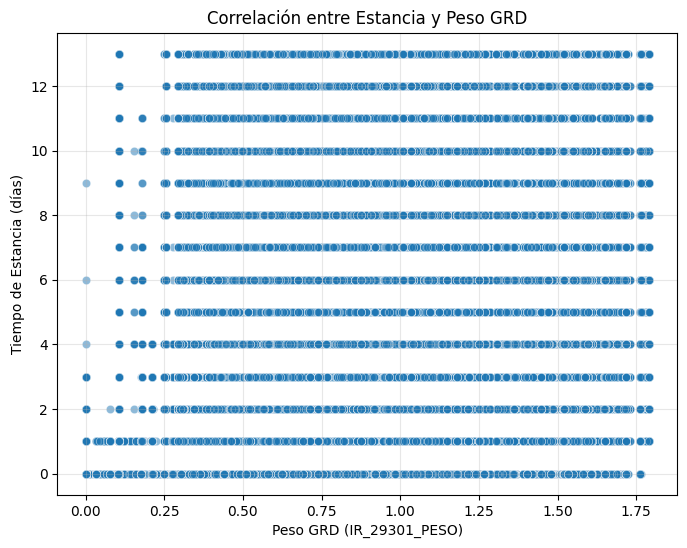

In [83]:
# Grafico que muestra la correlación entre TIEMPO_ESTANCIA y IR_29301_PESO
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="IR_29301_PESO", y="TIEMPO_ESTANCIA", alpha=0.5)
plt.title("Correlación entre Estancia y Peso GRD")
plt.xlabel("Peso GRD (IR_29301_PESO)")
plt.ylabel("Tiempo de Estancia (días)")
plt.grid(True, alpha=0.3)
plt.show()

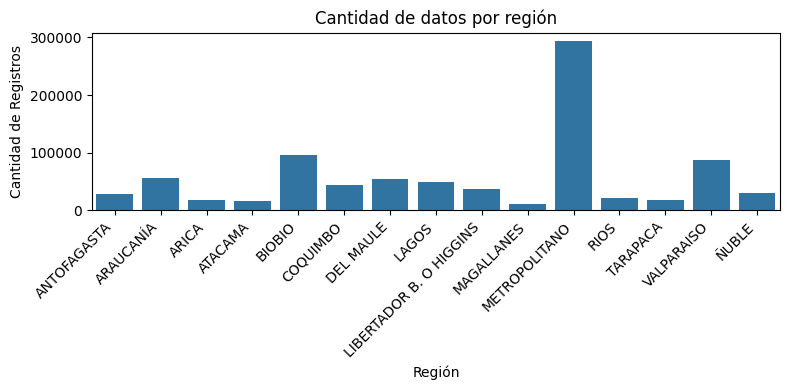

<Axes: xlabel='TipoRegion', ylabel='TIEMPO_ESTANCIA'>

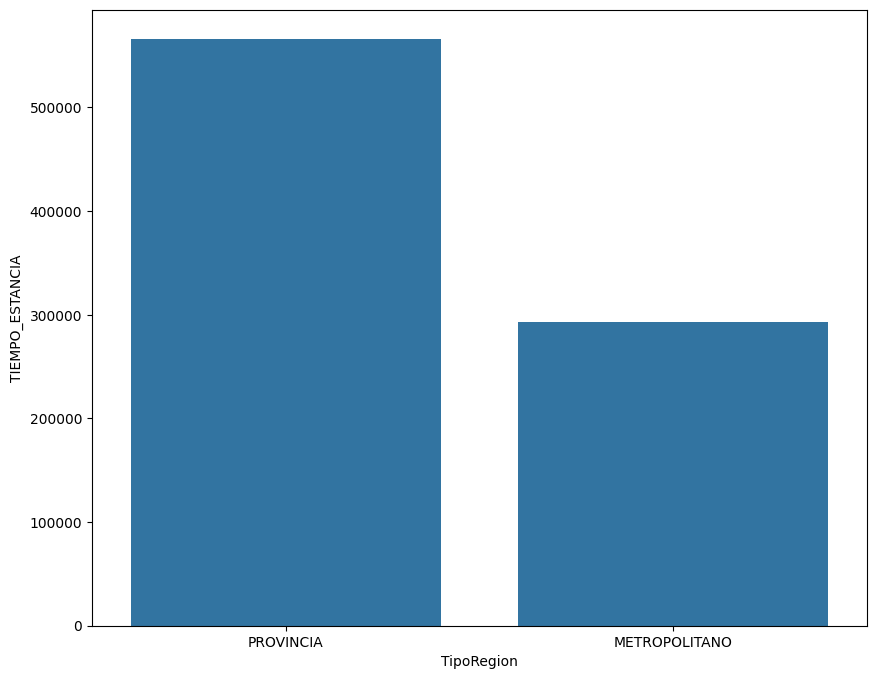

In [99]:
df_agrupado_por_region = data.groupby("Region").agg(
    {
        "IR_29301_PESO" : "count"
    }
).reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(df_agrupado_por_region, x = "Region", y = "IR_29301_PESO")
plt.xticks(rotation=45, ha='right')
plt.title("Cantidad de datos por región")
plt.xlabel("Región")
plt.ylabel("Cantidad de Registros")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(data, x = "TipoRegion", y = "TIEMPO_ESTANCIA",estimator=len)

In [108]:
display(data["SEXO"].unique())
all_data["SEXO_INT"] = all_data["SEXO"].map({"HOMBRE": 1, "MUJER": 0, "DESCONOCIDO": np.nan})

array(['HOMBRE', 'MUJER', 'DESCONOCIDO'], dtype=object)

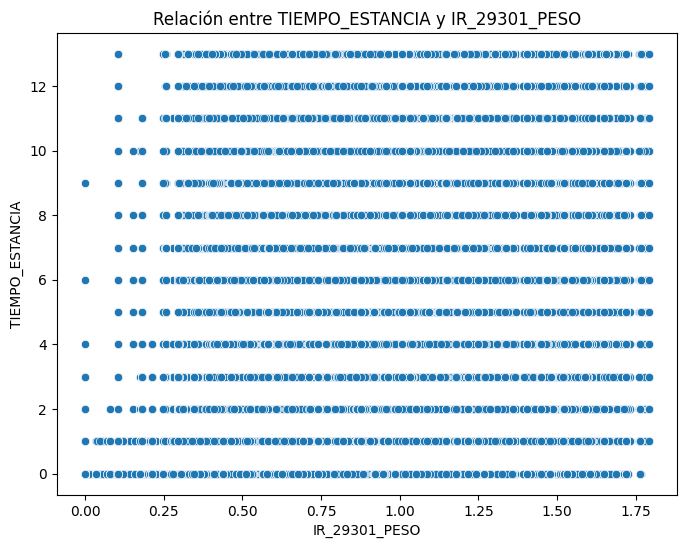

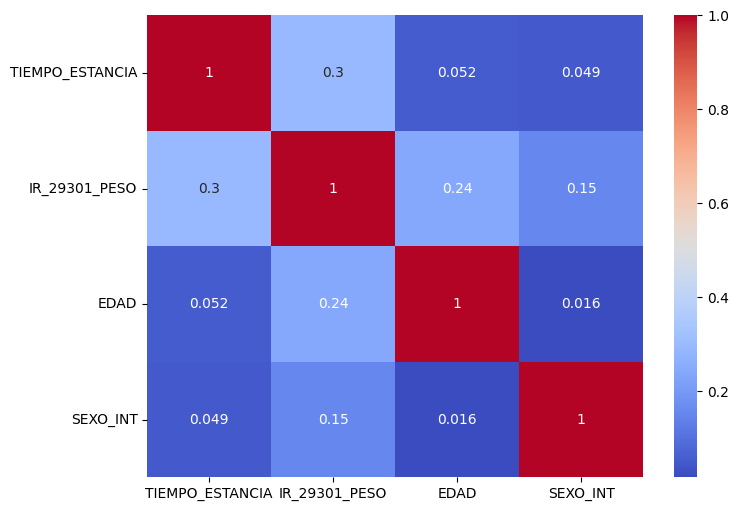

In [109]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data = data, y = "TIEMPO_ESTANCIA", x = "IR_29301_PESO")
plt.title("Relación entre TIEMPO_ESTANCIA y IR_29301_PESO")
plt.ylabel("TIEMPO_ESTANCIA")
plt.xlabel("IR_29301_PESO")
plt.show()



corr_matrix = all_data[["TIEMPO_ESTANCIA","IR_29301_PESO","EDAD", "SEXO_INT"]].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


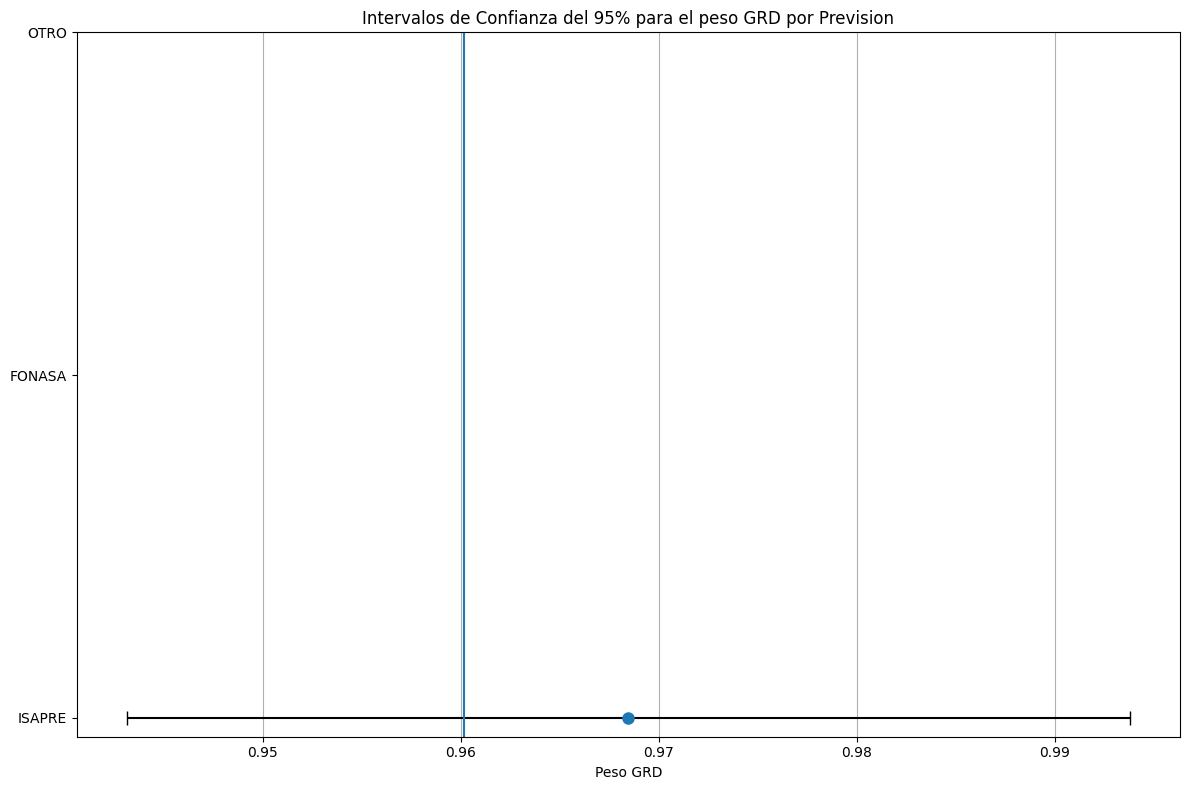

0.9601425824419132


In [110]:
previsiones = list(data["PREVISION"].unique())


datos = []

confianza = 0.95

for i in previsiones:
    dato_prevision = df[df["PREVISION"] == i]
    
    peso_grd = dato_prevision["IR_29301_PESO"]
    promedio = np.mean(peso_grd)
    desv_est = np.std(peso_grd)
    
    grados_libertad = len(peso_grd) - 1
    
    err_est_muestral = desv_est/np.sqrt(len(peso_grd))
    
    lim_inf, lim_sup = scipy.stats.t.interval(confianza, grados_libertad, promedio, err_est_muestral)
    
    datos.append({
        "PREVISION" : i,
        "PROMEDIO PESO_GRD" : promedio,
        "DESV ESTANDAR PESO_GRD" : desv_est,
        "INTERVALO CONFIANZA INF" : lim_inf,
        "INTERVALO CONFIANZA SUP" : lim_sup
    })
    
calculos = pd.DataFrame(datos)

calculos = calculos.sort_values(by = "PROMEDIO PESO_GRD", ascending=False)
calculos = calculos.reset_index().drop("index", axis = "columns")
promedio = np.mean(df["IR_29301_PESO"])

plt.figure(figsize=(12, 8))

plt.errorbar(
    calculos['PROMEDIO PESO_GRD'], calculos.index,
    xerr=[calculos['PROMEDIO PESO_GRD'] - calculos['INTERVALO CONFIANZA INF'], calculos['INTERVALO CONFIANZA SUP'] - calculos['PROMEDIO PESO_GRD']],
    fmt='o', capsize=5, capthick=1, ecolor='black', markersize=8
)

plt.yticks(calculos.index, calculos['PREVISION'])
plt.xlabel('Peso GRD')
plt.axvline(x = promedio)
plt.title('Intervalos de Confianza del 95% para el peso GRD por Prevision')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print(promedio)